In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/AI Quest/Assignment-09/weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(8555, 3)

In [6]:
df1 = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
df.Gender = le.fit_transform(df["Gender"])

In [10]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
x = df.drop("Weight", axis = 1)

In [12]:
y = df[["Weight"]]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [15]:
xtrain.shape

(5988, 2)

In [16]:
xtest.shape

(2567, 2)

#**Linear Regression**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [20]:
xtrain.head()

,Gender,Height
1277,1,72.385301
5361,0,60.960147
5728,0,69.119292
4276,1,68.271050
3112,1,64.991405


In [21]:
ytrain.head()

,Weight
1277,189.165592
5361,124.876796
5728,168.864403
4276,172.941248
3112,144.551044


In [22]:
reg.predict([[1, 72.385301]])

array([[206.84955312]])

In [23]:
reg.predict([[0, 69.119292]])

array([[168.01156243]])

In [24]:
ypred = reg.predict(xtest)
ypred

array([[143.83013436],
       [197.53417989],
       [184.63515112],
       ...,
       [160.7078525 ],
       [186.82852694],
       [201.4226542 ]])

###**Accuracy**

In [25]:
reg.score(xtrain, ytrain) #Training accuracy

0.8972135459668117

In [26]:
reg.score(xtest, ytest) #Testing accuracy

0.905995960709116

###**Mean Squared Error (MSE)**

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(ytest, ypred) # Finding the mean squared error (mse) of test dataset
mse

99.67250998070033

###**Mean Absolute Error (MAE)**

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mae = mean_absolute_error(ytest, ypred) # Finding the mean absolute error (mae) of test dataset
mae

7.98213259272913

#**KNN Regressor**

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
s = StandardScaler()

In [33]:
df["Height"] = s.fit_transform(df[["Height"]])

In [34]:
df.head()

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801


In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
kreg = KNeighborsRegressor(n_neighbors = 5)

In [37]:
kreg.fit(xtrain, ytrain)

KNeighborsRegressor()

###**Accuracy**

In [38]:
kreg.score(xtest, ytest)

0.8838502073708883

In [39]:
kreg.score(xtrain, ytrain)

0.9170756955071054

###**Mean Squared Error (MSE)**

In [40]:
y_pred = kreg.predict(xtest)

In [41]:
MSE = mean_squared_error(ytest, y_pred)
MSE

123.15365863436983

###**Prediction**

In [42]:
xtest.iloc[-1, : ]

Gender     1.000000
Height    71.476101
Name: 233, dtype: float64

In [43]:
kreg.predict([xtest.iloc[-1, : ]])

array([[200.56451578]])

In [44]:
ytest.tail()

,Weight
8004,110.815421
7644,148.605255
8521,153.436481
957,170.310122
233,195.392618


#**KNN Classifier**

In [45]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [46]:
x = df1.drop("Gender", axis = 1)

In [47]:
y = df1[["Gender"]]

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [49]:
ytrain.head()

,Gender
1757,Male
7389,Female
6944,Female
6362,Female
6438,Female


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
kcls = KNeighborsClassifier(n_neighbors = 5)

In [52]:
kcls.fit(xtrain, ytrain)

KNeighborsClassifier()

In [53]:
pred = kcls.predict(xtest)
pred

array(['Female', 'Female', 'Male', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score

###**Accuracy**

In [55]:
kcls.score(xtest, ytest)

0.9092325671990651

In [56]:
accuracy_score(ytest, pred)

0.9092325671990651

###**Confusion Matrix**

In [57]:
cm = confusion_matrix(ytest, pred)
cm

array([[ 947,  111],
       [ 122, 1387]])

In [58]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [59]:
tp

947

In [60]:
fn

111

In [61]:
fp

122

In [62]:
tn

1387

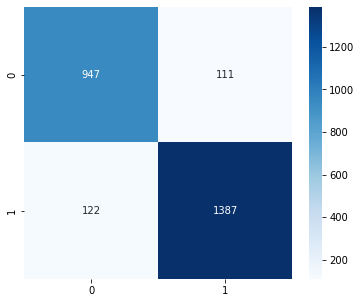

In [63]:
plt.figure(figsize = ( 6, 5))
sns.heatmap(cm, annot = True, fmt = "d", cmap = 'Blues')

###**ROC**

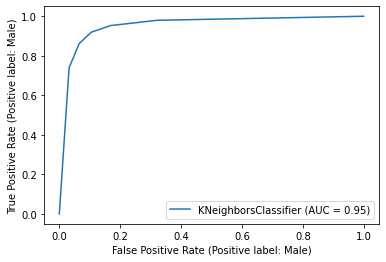

In [64]:
plot_roc_curve(kcls, xtest, ytest)

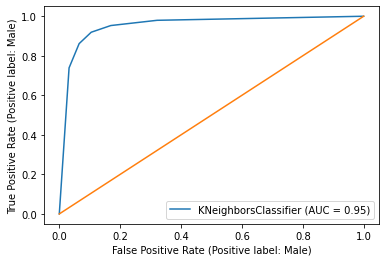

In [65]:
plot_roc_curve(kcls, xtest, ytest)
plt.plot([0, 1], [0, 1])

###**AUC**

In [66]:
knn_prob = kcls.predict_proba(xtest)

In [67]:
auc_score = roc_auc_score(ytest, knn_prob[ : , 1])

In [68]:
auc_score

0.9525490409778254

###**Classification report**

In [69]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

      Female       0.89      0.90      0.89      1058
        Male       0.93      0.92      0.92      1509

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

